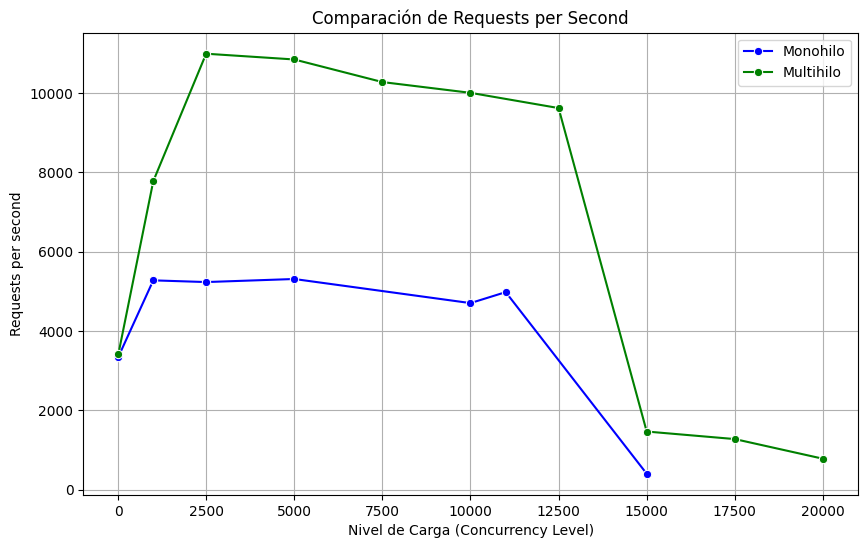

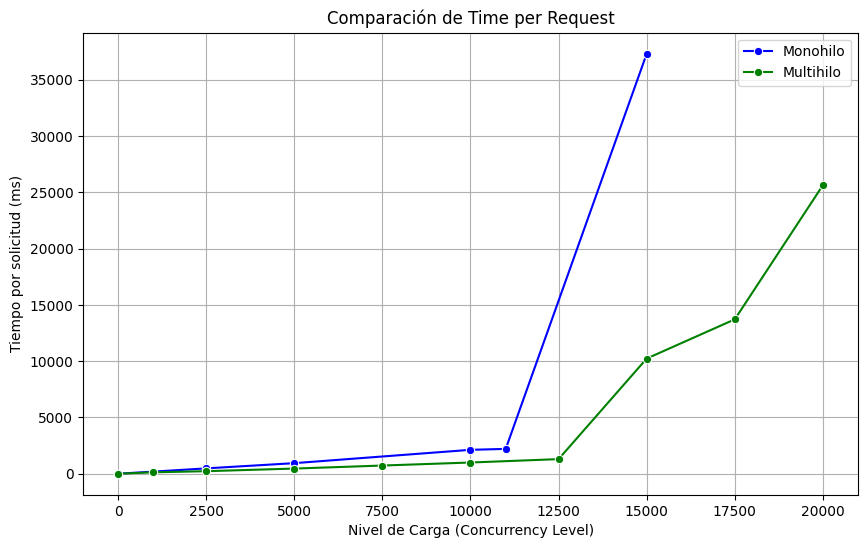

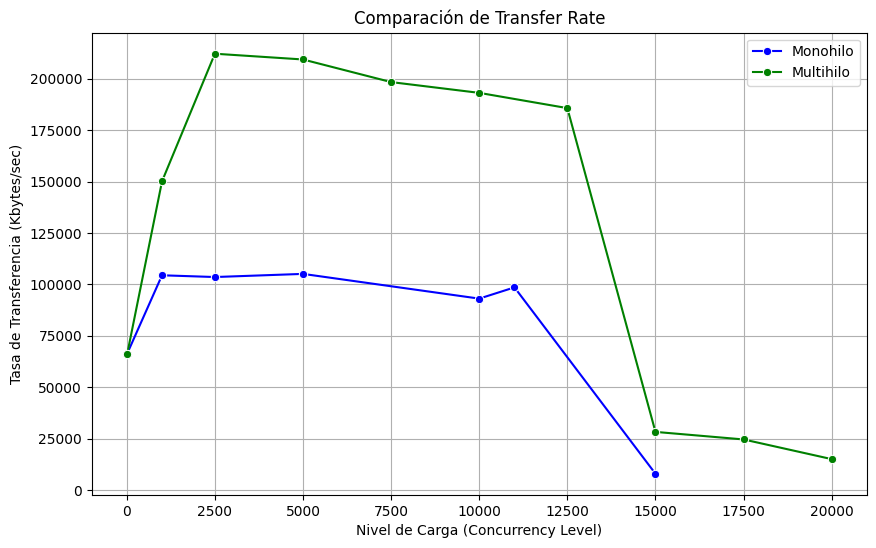

ANOVA - Requests per second: F_onewayResult(statistic=np.float64(1.9656730389109212), pvalue=np.float64(0.1812620717343505))
ANOVA - Time per request (ms): F_onewayResult(statistic=np.float64(0.023937069241395867), pvalue=np.float64(0.8791077296496734))
ANOVA - Transfer rate (Kbytes/sec): F_onewayResult(statistic=np.float64(1.7917459433175242), pvalue=np.float64(0.2006496552071743))


In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Función para procesar un archivo individual
def parse_ab_results(file_path):
    results = {
        "Concurrency Level": [],
        "Requests per second": [],
        "Time per request (ms)": [],
        "Transfer rate (Kbytes/sec)": []
    }
    
    with open(file_path, "r") as file:
        file_content = file.readlines()
        
        for line in file_content:
            if "Concurrency Level" in line:
                concurrency = int(re.search(r"(\d+)", line).group(1))
                results["Concurrency Level"].append(concurrency)
            elif "Requests per second" in line:
                rps = float(re.search(r"([\d\.]+) \[#/sec\]", line).group(1))
                results["Requests per second"].append(rps)
            elif "Time per request" in line and "(mean)" in line:
                tpr = float(re.search(r"([\d\.]+) \[ms\]", line).group(1))
                results["Time per request (ms)"].append(tpr)
            elif "Transfer rate" in line:
                tr = float(re.search(r"([\d\.]+) \[Kbytes/sec\]", line).group(1))
                results["Transfer rate (Kbytes/sec)"].append(tr)

    return results

# Leer y clasificar archivos en la carpeta
folder_path = "throughput_tests"
data_monohilo = {"Concurrency Level": [], "Requests per second": [], "Time per request (ms)": [], "Transfer rate (Kbytes/sec)": []}
data_multihilo = {"Concurrency Level": [], "Requests per second": [], "Time per request (ms)": [], "Transfer rate (Kbytes/sec)": []}

for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        results = parse_ab_results(file_path)
        
        if "monohilo" in file_name:
            for key in data_monohilo:
                data_monohilo[key].extend(results[key])
        elif "multihilo" in file_name:
            for key in data_multihilo:
                data_multihilo[key].extend(results[key])

# Convertir los datos a DataFrames
df_monohilo = pd.DataFrame(data_monohilo)
df_multihilo = pd.DataFrame(data_multihilo)

# Graficar comparación: Requests per second
plt.figure(figsize=(10, 6))
sns.lineplot(x="Concurrency Level", y="Requests per second", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Concurrency Level", y="Requests per second", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Requests per Second")
plt.xlabel("Nivel de Carga (Concurrency Level)")
plt.ylabel("Requests per second")
plt.legend()
plt.grid()
plt.show()

# Graficar comparación: Time per request
plt.figure(figsize=(10, 6))
sns.lineplot(x="Concurrency Level", y="Time per request (ms)", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Concurrency Level", y="Time per request (ms)", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Time per Request")
plt.xlabel("Nivel de Carga (Concurrency Level)")
plt.ylabel("Tiempo por solicitud (ms)")
plt.legend()
plt.grid()
plt.show()

# Graficar comparación: Transfer rate
plt.figure(figsize=(10, 6))
sns.lineplot(x="Concurrency Level", y="Transfer rate (Kbytes/sec)", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Concurrency Level", y="Transfer rate (Kbytes/sec)", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Transfer Rate")
plt.xlabel("Nivel de Carga (Concurrency Level)")
plt.ylabel("Tasa de Transferencia (Kbytes/sec)")
plt.legend()
plt.grid()
plt.show()

# Análisis estadístico: ANOVA para comparar los dos servidores
anova_requests = stats.f_oneway(df_monohilo["Requests per second"], df_multihilo["Requests per second"])
anova_time = stats.f_oneway(df_monohilo["Time per request (ms)"], df_multihilo["Time per request (ms)"])
anova_transfer = stats.f_oneway(df_monohilo["Transfer rate (Kbytes/sec)"], df_multihilo["Transfer rate (Kbytes/sec)"])

# Mostrar resultados ANOVA
print("ANOVA - Requests per second:", anova_requests)
print("ANOVA - Time per request (ms):", anova_time)
print("ANOVA - Transfer rate (Kbytes/sec):", anova_transfer)


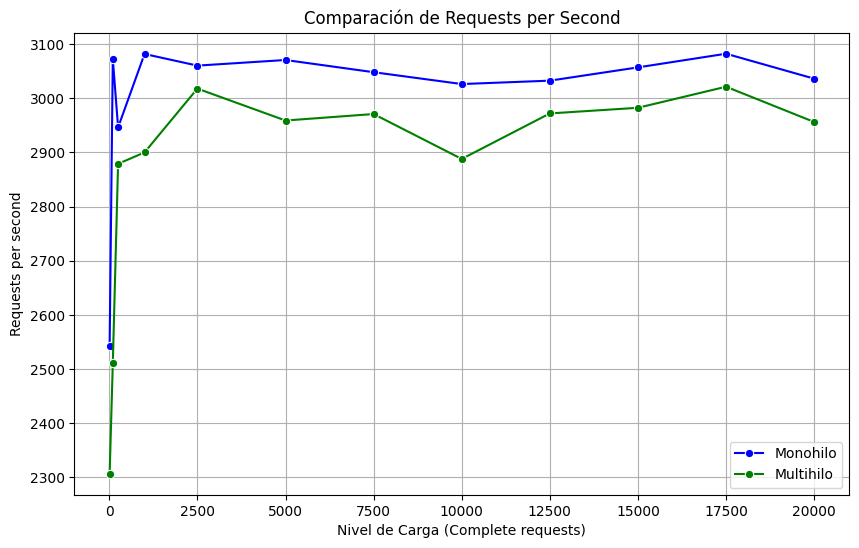

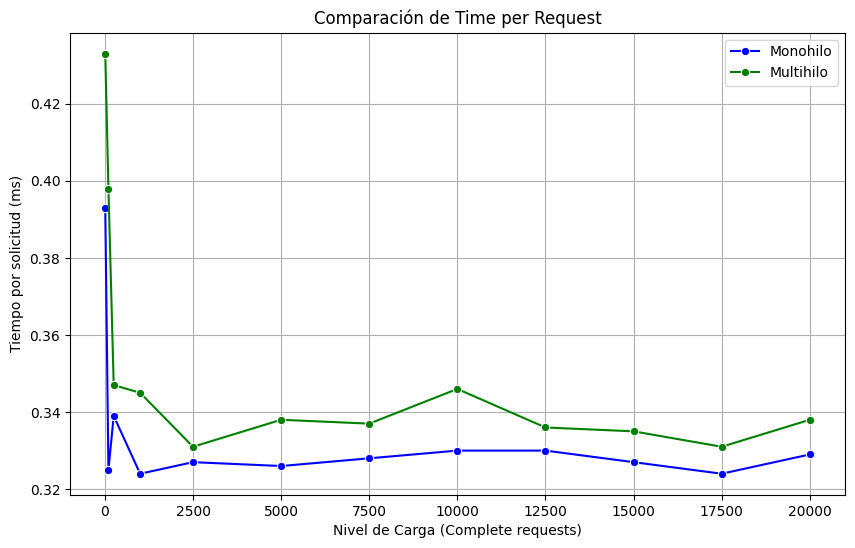

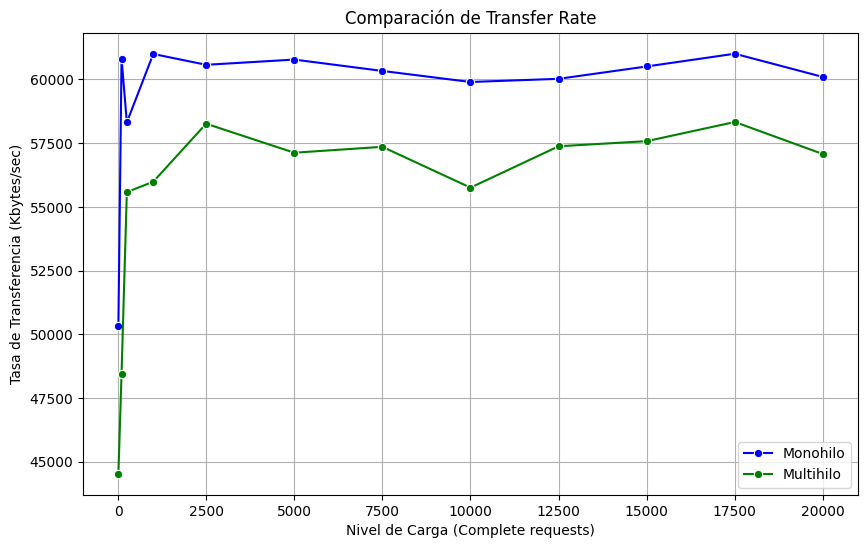

ANOVA - Requests per second: F_onewayResult(statistic=np.float64(3.3258777190945437), pvalue=np.float64(0.08181343793813514))
ANOVA - Time per request (ms): F_onewayResult(statistic=np.float64(2.798058970951842), pvalue=np.float64(0.10854114779093264))
ANOVA - Transfer rate (Kbytes/sec): F_onewayResult(statistic=np.float64(7.740238192314603), pvalue=np.float64(0.010867322110649362))


In [35]:
# Función para procesar un archivo individual
def parse_ab_results(file_path):
    results = {
        "Complete requests": [],
        "Requests per second": [],
        "Time per request (ms)": [],
        "Transfer rate (Kbytes/sec)": []
    }
    
    with open(file_path, "r") as file:
        file_content = file.readlines()
        
        for line in file_content:
            if "Complete requests" in line:
                concurrency = int(re.search(r"(\d+)", line).group(1))
                results["Complete requests"].append(concurrency)
            elif "Requests per second" in line:
                rps = float(re.search(r"([\d\.]+) \[#/sec\]", line).group(1))
                results["Requests per second"].append(rps)
            elif "Time per request" in line and "(mean)" in line:
                tpr = float(re.search(r"([\d\.]+) \[ms\]", line).group(1))
                results["Time per request (ms)"].append(tpr)
            elif "Transfer rate" in line:
                tr = float(re.search(r"([\d\.]+) \[Kbytes/sec\]", line).group(1))
                results["Transfer rate (Kbytes/sec)"].append(tr)

    return results

# Leer y clasificar archivos en la carpeta
folder_path = "throughput_tests_2"
data_monohilo = {"Complete requests": [], "Requests per second": [], "Time per request (ms)": [], "Transfer rate (Kbytes/sec)": []}
data_multihilo = {"Complete requests": [], "Requests per second": [], "Time per request (ms)": [], "Transfer rate (Kbytes/sec)": []}

for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        results = parse_ab_results(file_path)
        
        if "monohilo" in file_name:
            for key in data_monohilo:
                data_monohilo[key].extend(results[key])
        elif "multihilo" in file_name:
            for key in data_multihilo:
                data_multihilo[key].extend(results[key])

# Convertir los datos a DataFrames
df_monohilo = pd.DataFrame(data_monohilo)
df_multihilo = pd.DataFrame(data_multihilo)

# Graficar comparación: Requests per second
plt.figure(figsize=(10, 6))
sns.lineplot(x="Complete requests", y="Requests per second", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Complete requests", y="Requests per second", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Requests per Second")
plt.xlabel("Nivel de Carga (Complete requests)")
plt.ylabel("Requests per second")
plt.legend()
plt.grid()
plt.show()

# Graficar comparación: Time per request
plt.figure(figsize=(10, 6))
sns.lineplot(x="Complete requests", y="Time per request (ms)", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Complete requests", y="Time per request (ms)", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Time per Request")
plt.xlabel("Nivel de Carga (Complete requests)")
plt.ylabel("Tiempo por solicitud (ms)")
plt.legend()
plt.grid()
plt.show()

# Graficar comparación: Transfer rate
plt.figure(figsize=(10, 6))
sns.lineplot(x="Complete requests", y="Transfer rate (Kbytes/sec)", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Complete requests", y="Transfer rate (Kbytes/sec)", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Transfer Rate")
plt.xlabel("Nivel de Carga (Complete requests)")
plt.ylabel("Tasa de Transferencia (Kbytes/sec)")
plt.legend()
plt.grid()
plt.show()

# Análisis estadístico: ANOVA para comparar los dos servidores
anova_requests = stats.f_oneway(df_monohilo["Requests per second"], df_multihilo["Requests per second"])
anova_time = stats.f_oneway(df_monohilo["Time per request (ms)"], df_multihilo["Time per request (ms)"])
anova_transfer = stats.f_oneway(df_monohilo["Transfer rate (Kbytes/sec)"], df_multihilo["Transfer rate (Kbytes/sec)"])

# Mostrar resultados ANOVA
print("ANOVA - Requests per second:", anova_requests)
print("ANOVA - Time per request (ms):", anova_time)
print("ANOVA - Transfer rate (Kbytes/sec):", anova_transfer)


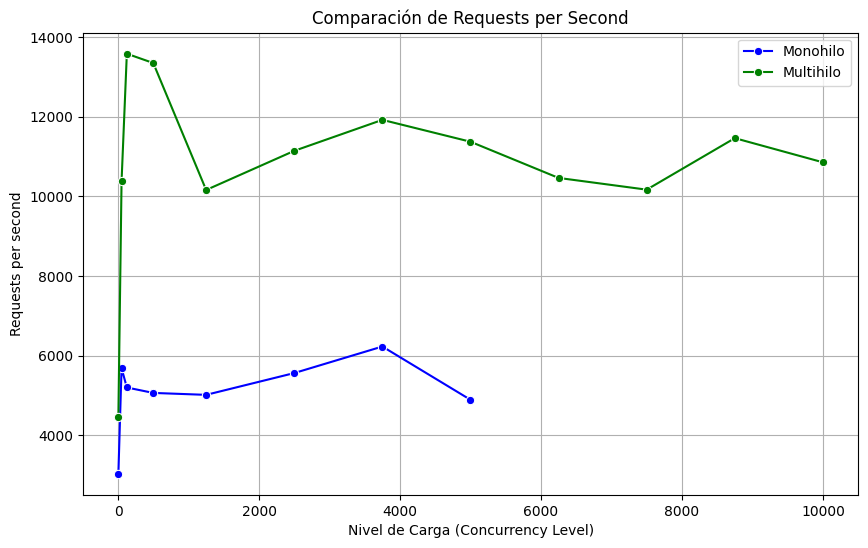

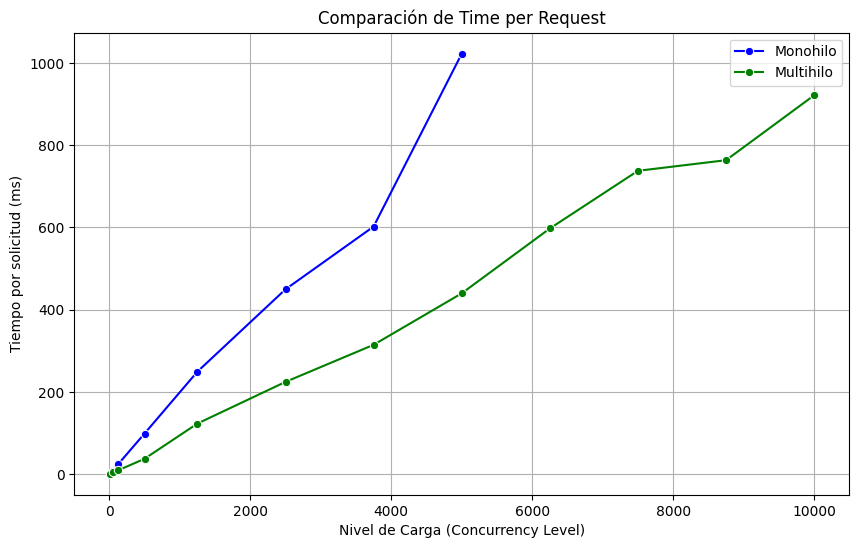

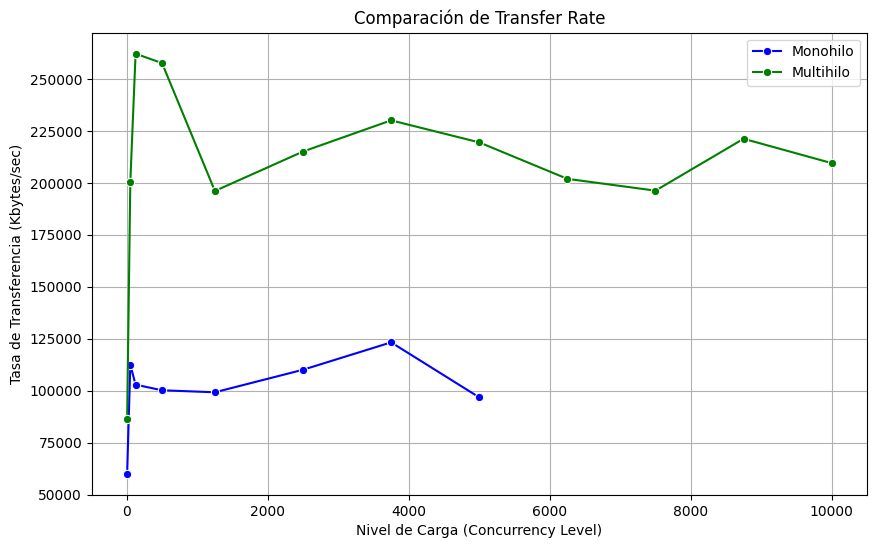

ANOVA - Requests per second: F_onewayResult(statistic=np.float64(43.86542304728889), pvalue=np.float64(3.2271921682502654e-06))
ANOVA - Time per request (ms): F_onewayResult(statistic=np.float64(0.06632594855480513), pvalue=np.float64(0.7996844830646914))
ANOVA - Transfer rate (Kbytes/sec): F_onewayResult(statistic=np.float64(41.70318693483366), pvalue=np.float64(4.474112646981972e-06))


In [39]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Función para procesar un archivo individual
def parse_ab_results(file_path):
    results = {
        "Concurrency Level": [],
        "Requests per second": [],
        "Time per request (ms)": [],
        "Transfer rate (Kbytes/sec)": []
    }
    
    with open(file_path, "r") as file:
        file_content = file.readlines()
        
        for line in file_content:
            if "Concurrency Level" in line:
                concurrency = int(re.search(r"(\d+)", line).group(1))
                results["Concurrency Level"].append(concurrency)
            elif "Requests per second" in line:
                rps = float(re.search(r"([\d\.]+) \[#/sec\]", line).group(1))
                results["Requests per second"].append(rps)
            elif "Time per request" in line and "(mean)" in line:
                tpr = float(re.search(r"([\d\.]+) \[ms\]", line).group(1))
                results["Time per request (ms)"].append(tpr)
            elif "Transfer rate" in line:
                tr = float(re.search(r"([\d\.]+) \[Kbytes/sec\]", line).group(1))
                results["Transfer rate (Kbytes/sec)"].append(tr)

    return results

# Leer y clasificar archivos en la carpeta
folder_path = "throughput_tests_3"
data_monohilo = {"Concurrency Level": [], "Requests per second": [], "Time per request (ms)": [], "Transfer rate (Kbytes/sec)": []}
data_multihilo = {"Concurrency Level": [], "Requests per second": [], "Time per request (ms)": [], "Transfer rate (Kbytes/sec)": []}

for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        results = parse_ab_results(file_path)
        
        if "monohilo" in file_name:
            for key in data_monohilo:
                data_monohilo[key].extend(results[key])
        elif "multihilo" in file_name:
            for key in data_multihilo:
                data_multihilo[key].extend(results[key])

# Convertir los datos a DataFrames
df_monohilo = pd.DataFrame(data_monohilo)
df_multihilo = pd.DataFrame(data_multihilo)

# Graficar comparación: Requests per second
plt.figure(figsize=(10, 6))
sns.lineplot(x="Concurrency Level", y="Requests per second", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Concurrency Level", y="Requests per second", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Requests per Second")
plt.xlabel("Nivel de Carga (Concurrency Level)")
plt.ylabel("Requests per second")
plt.legend()
plt.grid()
plt.show()

# Graficar comparación: Time per request
plt.figure(figsize=(10, 6))
sns.lineplot(x="Concurrency Level", y="Time per request (ms)", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Concurrency Level", y="Time per request (ms)", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Time per Request")
plt.xlabel("Nivel de Carga (Concurrency Level)")
plt.ylabel("Tiempo por solicitud (ms)")
plt.legend()
plt.grid()
plt.show()

# Graficar comparación: Transfer rate
plt.figure(figsize=(10, 6))
sns.lineplot(x="Concurrency Level", y="Transfer rate (Kbytes/sec)", marker="o", data=df_monohilo, label="Monohilo", color="blue")
sns.lineplot(x="Concurrency Level", y="Transfer rate (Kbytes/sec)", marker="o", data=df_multihilo, label="Multihilo", color="green")
plt.title("Comparación de Transfer Rate")
plt.xlabel("Nivel de Carga (Concurrency Level)")
plt.ylabel("Tasa de Transferencia (Kbytes/sec)")
plt.legend()
plt.grid()
plt.show()

# Análisis estadístico: ANOVA para comparar los dos servidores
anova_requests = stats.f_oneway(df_monohilo["Requests per second"], df_multihilo["Requests per second"])
anova_time = stats.f_oneway(df_monohilo["Time per request (ms)"], df_multihilo["Time per request (ms)"])
anova_transfer = stats.f_oneway(df_monohilo["Transfer rate (Kbytes/sec)"], df_multihilo["Transfer rate (Kbytes/sec)"])

# Mostrar resultados ANOVA
print("ANOVA - Requests per second:", anova_requests)
print("ANOVA - Time per request (ms):", anova_time)
print("ANOVA - Transfer rate (Kbytes/sec):", anova_transfer)
